### <span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#191970;">Project 4 - Data Mining - Clustering - Part 1

#### <span style="font-family: Arial; font-weight:regular;font-size:1.2em;color:#708090;">Student Name - Madhu Narayanan  

#### <span style="font-family: Arial; font-weight:regular;font-size:1.2em;color:#708090;">Batch - July 2020

#### <span style="font-family: Arial; font-weight:bold;font-size:1.3em;color:#708090;"> Problem Statement

A leading bank wants to develop a customer segmentation to give promotional offers to its customers.   
They collected a sample that summarizes the activities of users during the past few months.   
We are given the task to identify the segments based on credit card usage.

#### <span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#0e92ea;">Importing required libraries for the problem statement given above.

In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#for preprocessing as Standard Scaler
from sklearn.preprocessing import StandardScaler 

#for Clustering Non-Hierarchical
from sklearn.cluster import KMeans 

#for clustering silhouette score
from sklearn.metrics import silhouette_samples, silhouette_score 

#for Clustering Hierarchical
from scipy.cluster.hierarchy import fcluster
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

import warnings
warnings.filterwarnings('ignore')

#### <span style="font-family: Arial; font-weight:bold;font-size:1.3em;color:#FF0000;">1.1 Read the data and do EDA, Describe data briefly

In [56]:
bm = pd.read_csv('bank_marketing_part1_Data.csv')

In [57]:
bm.head(10)

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837
5,12.70,13.41,0.8874,5.183,3.091,8.456,5.000
6,12.02,13.33,0.8503,5.350,2.810,4.271,5.308
7,13.74,14.05,0.8744,5.482,3.114,2.932,4.825
8,18.17,16.26,0.8637,6.271,3.512,2.853,6.273
9,11.23,12.88,0.8511,5.140,2.795,4.325,5.003


In [58]:
bm.shape

(210, 7)

The Dataset contains 210 records and 7 attributes/variables.

In [59]:
bm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   spending                      210 non-null    float64
 1   advance_payments              210 non-null    float64
 2   probability_of_full_payment   210 non-null    float64
 3   current_balance               210 non-null    float64
 4   credit_limit                  210 non-null    float64
 5   min_payment_amt               210 non-null    float64
 6   max_spent_in_single_shopping  210 non-null    float64
dtypes: float64(7)
memory usage: 11.6 KB


Description of attributes from the dataset:

1. spending: Amount spent by the customer per month (in 1000s).
2. advance_payments: Amount paid by the customer in advance by cash (in 100s).  
3. probability_of_full_payment: Probability of payment done in full by the customer to the bank.  
4. current_balance: Balance amount left in the account to make purchases (in 1000s).  
5. credit_limit: Limit of the amount in credit card (10000s).  
6. min_payment_amt : minimum paid by the customer while making payments for purchases made monthly (in 100s).
7. max_spent_in_single_shopping: Maximum amount spent in one purchase (in 1000s).

All the variables are of float datatype.

#### <span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#0e92ea;">Checking for Null values & duplicate records if any. This is part of data cleaning before getting onto EDA.

In [60]:
bm.isnull().sum()

spending                        0
advance_payments                0
probability_of_full_payment     0
current_balance                 0
credit_limit                    0
min_payment_amt                 0
max_spent_in_single_shopping    0
dtype: int64

In [61]:
bm.duplicated().sum()

0

There are NO null values and duplicated recoreds. Also there are no missing values as all are of float type. Therefore the dataset is good to go without any cleaning.

In [62]:
bm.describe().T

,count,mean,std,min,25%,50%,75%,max
spending,210.0,14.847524,2.909699,10.5900,12.27000,14.35500,17.305000,21.1800
advance_payments,210.0,14.559286,1.305959,12.4100,13.45000,14.32000,15.715000,17.2500
probability_of_full_payment,210.0,0.870999,0.023629,0.8081,0.85690,0.87345,0.887775,0.9183
current_balance,210.0,5.628533,0.443063,4.8990,5.26225,5.52350,5.979750,6.6750
credit_limit,210.0,3.258605,0.377714,2.6300,2.94400,3.23700,3.561750,4.0330
min_payment_amt,210.0,3.700201,1.503557,0.7651,2.56150,3.59900,4.768750,8.4560
max_spent_in_single_shopping,210.0,5.408071,0.491480,4.5190,5.04500,5.22300,5.877000,6.5500


#### <span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#0e92ea;">Univariate Analysis

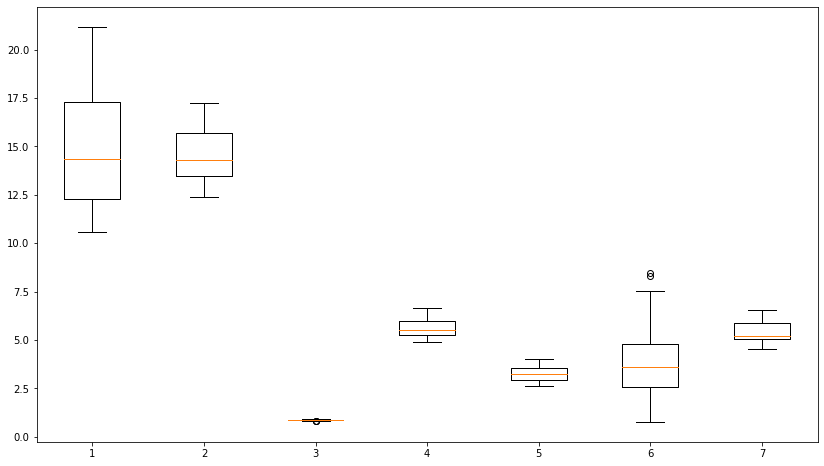

In [63]:
plt.figure(figsize=(14,8))
plt.boxplot(bm);

Text(0.5, 1.0, 'max_spent_in_single_shopping')

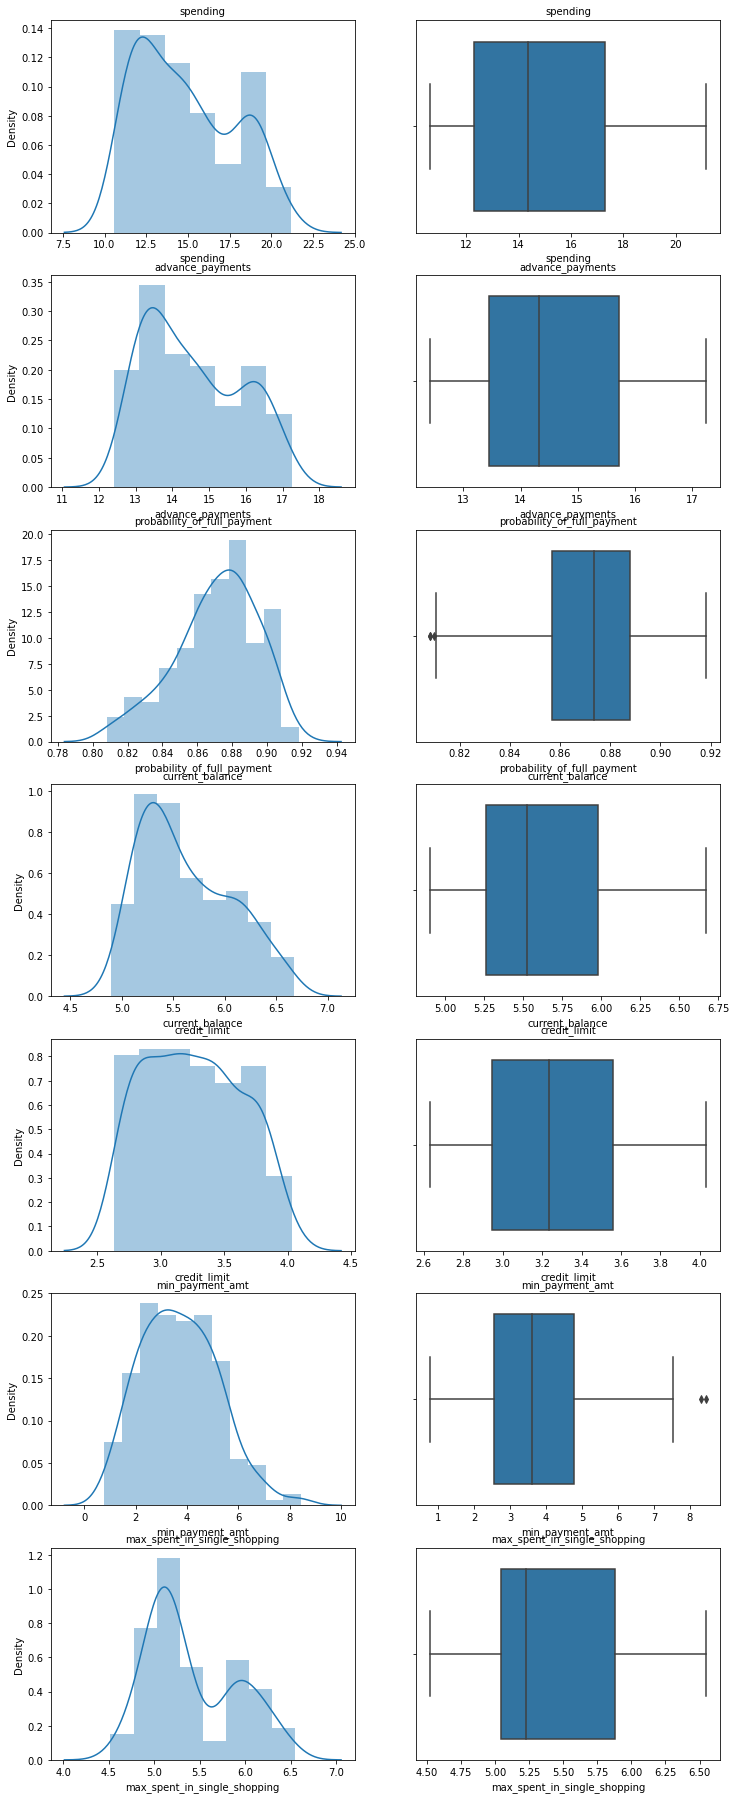

In [64]:
fig, axes = plt.subplots(nrows=7,ncols=2)
fig.set_size_inches(12,32)

a = sns.distplot(bm['spending'] , ax=axes[0][0])
a.set_title("spending",fontsize=10)
a = sns.boxplot(bm['spending'] , orient = "v" , ax=axes[0][1])
a.set_title("spending",fontsize=10)


a = sns.distplot(bm['advance_payments'] , ax=axes[1][0])
a.set_title("advance_payments",fontsize=10)
a = sns.boxplot(bm['advance_payments'] , orient = "v" , ax=axes[1][1])
a.set_title("advance_payments",fontsize=10)


a = sns.distplot(bm['probability_of_full_payment'] , ax=axes[2][0])
a.set_title("probability_of_full_payment",fontsize=10)
a = sns.boxplot(bm['probability_of_full_payment'] , orient = "v" , ax=axes[2][1])
a.set_title("probability_of_full_payment",fontsize=10)



a = sns.distplot(bm['current_balance'] , ax=axes[3][0])
a.set_title("current_balance",fontsize=10)
a = sns.boxplot(bm['current_balance'] , orient = "v" , ax=axes[3][1])
a.set_title("current_balance",fontsize=10)


a = sns.distplot(bm['credit_limit'] , ax=axes[4][0])
a.set_title("credit_limit",fontsize=10)
a = sns.boxplot(bm['credit_limit'] , orient = "v" , ax=axes[4][1])
a.set_title("credit_limit",fontsize=10)


a = sns.distplot(bm['min_payment_amt'] , ax=axes[5][0])
a.set_title("min_payment_amt",fontsize=10)
a = sns.boxplot(bm['min_payment_amt'] , orient = "v" , ax=axes[5][1])
a.set_title("min_payment_amt",fontsize=10)

a = sns.distplot(bm['max_spent_in_single_shopping'] , ax=axes[6][0])
a.set_title("max_spent_in_single_shopping",fontsize=10)
a = sns.boxplot(bm['max_spent_in_single_shopping'] , orient = "v" , ax=axes[6][1])
a.set_title("max_spent_in_single_shopping",fontsize=10)





From the above graphs, we could see that the data is skewed for few and normally distributed for few of the attributes. However, we couyld see the magnitudes are different for each variables.  
Also the original dataset has got negligible outliers in only 2 out of 7 variables.
We shall now understand the multicollinearity of the dataset using Multivariate Analysis like Pair plot, Pearson's Correlation & Heat map.

<Figure size 720x576 with 0 Axes>

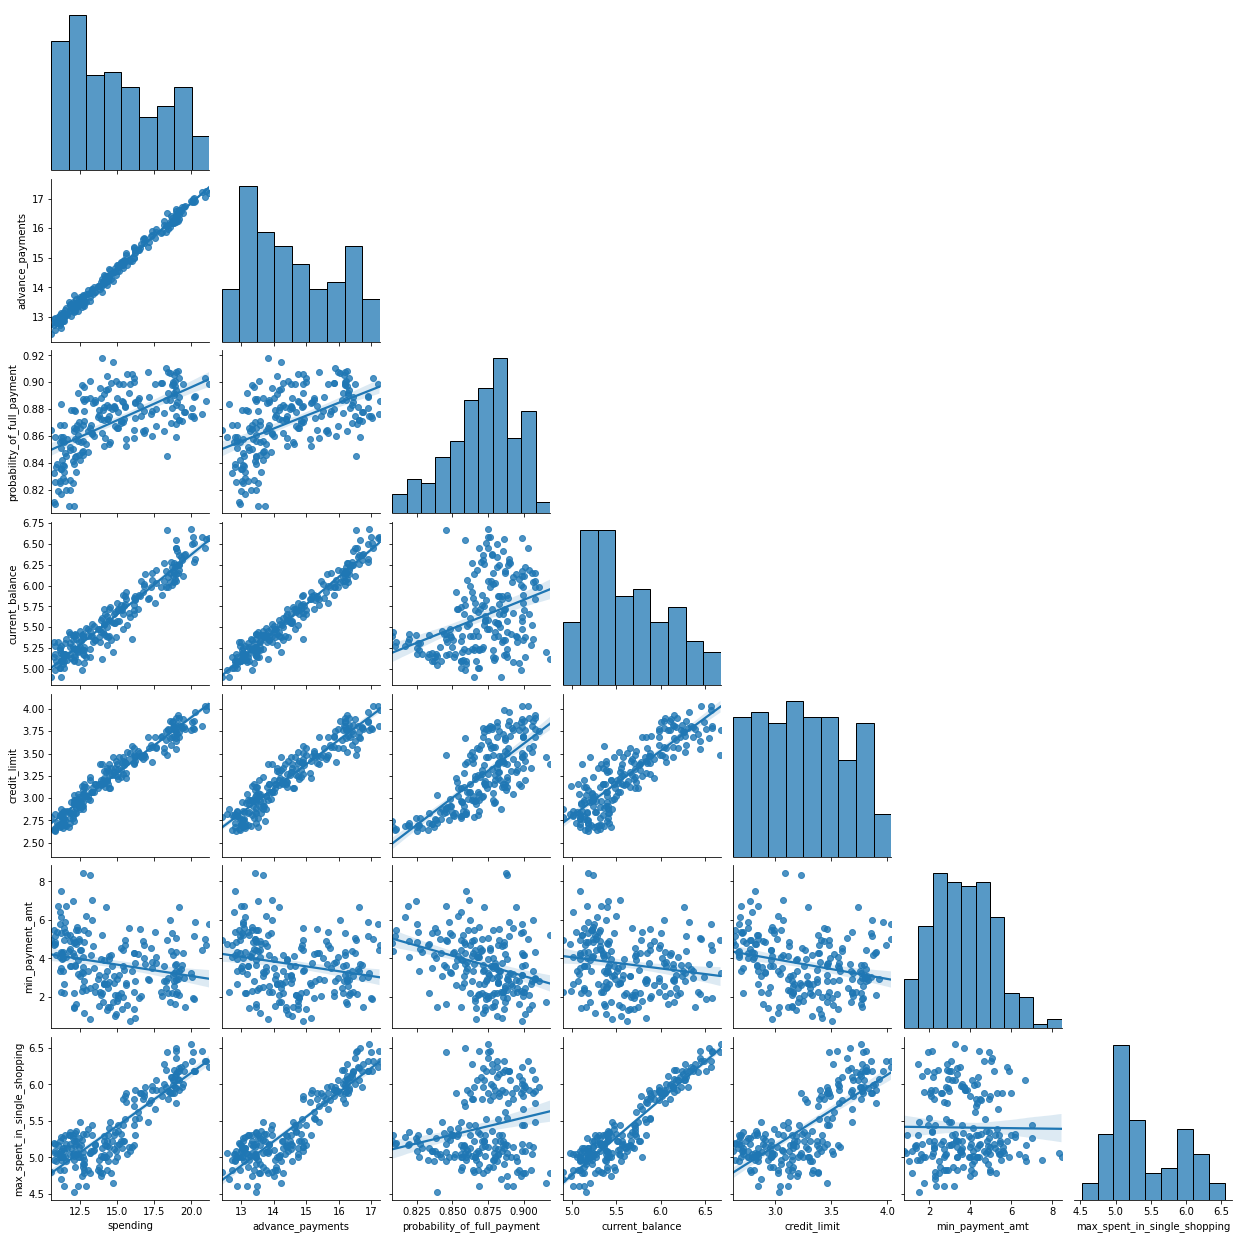

In [65]:
plt.figure(figsize=(10,8))
sns.pairplot(bm, corner=True, kind='reg');

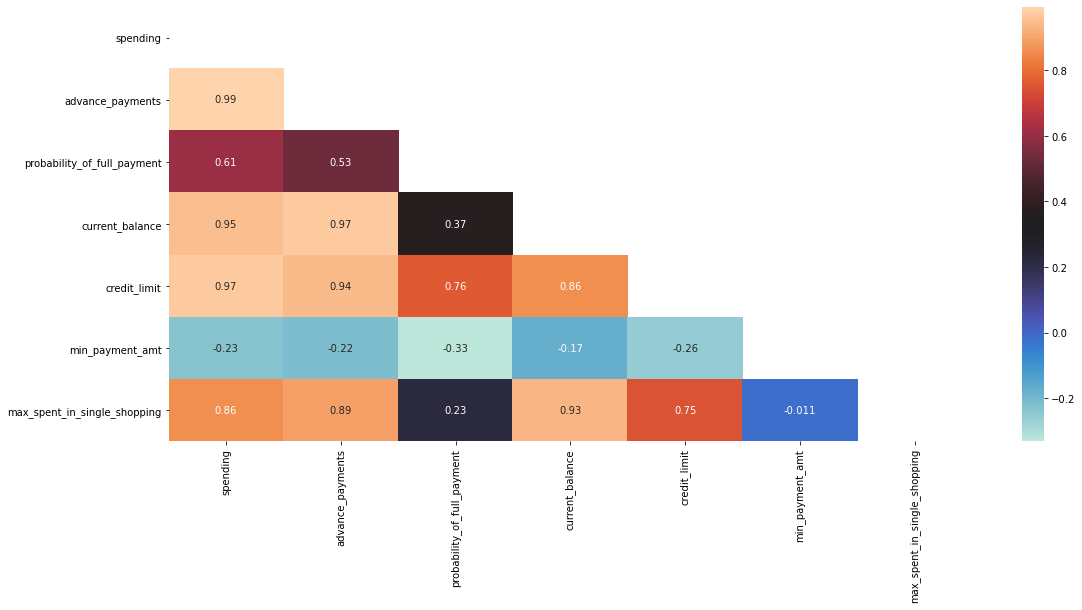

In [66]:
corr = bm.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
plt.figure(figsize=(18,8))
sns.heatmap(corr, annot=True, mask=mask,cmap='icefire');

From the above pairplot and correlation heat map, we can see the following top five with high postive correlation:

1. spending vs advance_payments - 0.99
2. credit_limit vs spending - 0.97
3. current_balance vs advance_payments - 0.97
4. current_balance vs spending - 0.95
5. credit_limit vs advance_payments - 0.94 
6. max_spent_in_single_shopping vs current_balance - 0.93


#### <span style="font-family: Arial; font-weight:bold;font-size:1.3em;color:#FF0000;">1.2 Do you think scaling is necessary for clustering in this case? Justify

Let's broadly visualise the dataset with histogram of bins 30 ( 210 records with 7 attributes when divided can consider 30 bins) and a cumulative distribution plot to understand how the data is spread.

<AxesSubplot:ylabel='Frequency'>

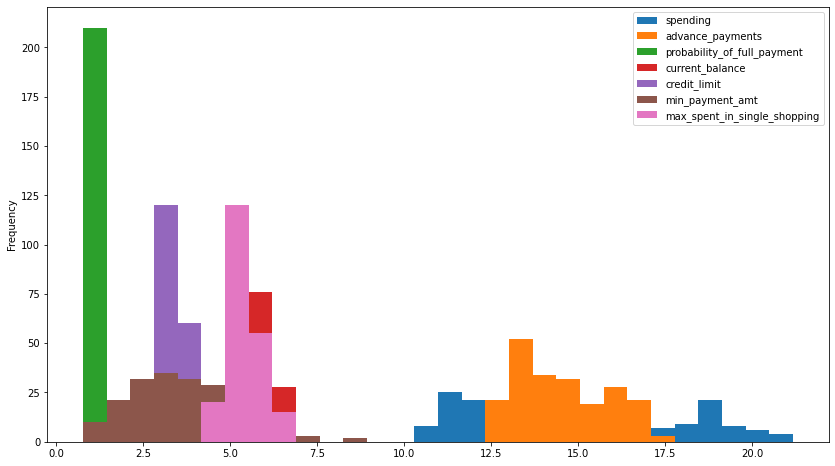

In [67]:
bm.plot(kind='hist',bins=30,figsize=(14,8))

<AxesSubplot:ylabel='Density'>

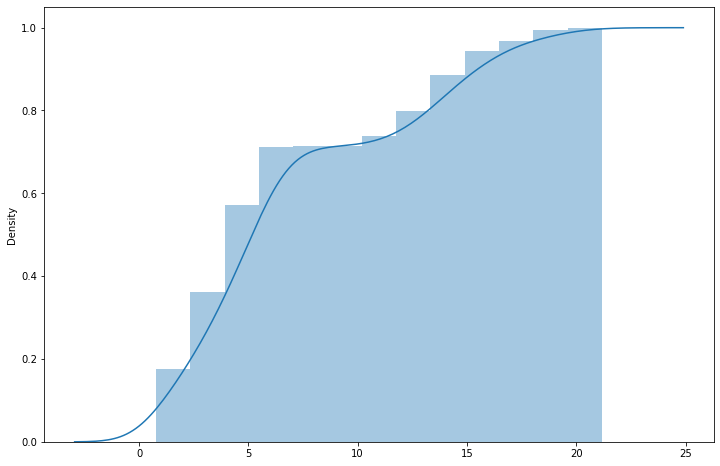

In [68]:
plt.figure(figsize=(12,8))
sns.distplot(bm, hist_kws=dict(cumulative=True), kde_kws=dict(cumulative=True))

From the above graphs of histogram and distribution plot, it is understood that there is scaling required for the dataset as the values of each variable is in in different magnitude. If the data is processed without scaling then the output will be skewed to the higher magnitude data values.

Therefore to avoid the bias of higher magnitiude data skewing the output, we have to scale the data.

In [69]:
X=StandardScaler()

In [70]:
scaled_df = X.fit_transform(bm)

In [71]:
scaled_df

array([[ 1.75435461,  1.81196782,  0.17822987, ...,  1.33857863,
        -0.29880602,  2.3289982 ],
       [ 0.39358228,  0.25383997,  1.501773  , ...,  0.85823561,
        -0.24280501, -0.53858174],
       [ 1.41330028,  1.42819249,  0.50487353, ...,  1.317348  ,
        -0.22147129,  1.50910692],
       ...,
       [-0.2816364 , -0.30647202,  0.36488339, ..., -0.15287318,
        -1.3221578 , -0.83023461],
       [ 0.43836719,  0.33827054,  1.23027698, ...,  0.60081421,
        -0.95348449,  0.07123789],
       [ 0.24889256,  0.45340314, -0.77624835, ..., -0.07325831,
        -0.70681338,  0.96047321]])

In [72]:
scaled_df = pd.DataFrame(scaled_df, index=bm.index, columns=bm.columns)
scaled_df.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,1.754355,1.811968,0.178230,2.367533,1.338579,-0.298806,2.328998
1,0.393582,0.253840,1.501773,-0.600744,0.858236,-0.242805,-0.538582
2,1.413300,1.428192,0.504874,1.401485,1.317348,-0.221471,1.509107
3,-1.384034,-1.227533,-2.591878,-0.793049,-1.639017,0.987884,-0.454961
4,1.082581,0.998364,1.196340,0.591544,1.155464,-1.088154,0.874813


#### <span style="font-family: Arial; font-weight:bold;font-size:1.3em;color:#FF0000;">1.3 Apply hierarchical clustering to scaled data. Identify the number of optimum clusters using Dendrogram and briefly describe them

#### <span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#0e92ea;">Performing Hierarchical Clustering with the Ward's linkage method and plotting the dendrogram.

In [73]:
wardlink = linkage(scaled_df,method='ward')

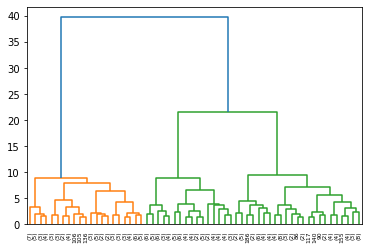

In [74]:
dend = dendrogram(wardlink, truncate_mode='lastp' ,p=60)

From the above dendrogram, the clusters are clearly split based on cutting of line which is @ 9(i.e. 9 clusters).However if we go by colour codes, there are visibly 3 Clusters. 

Let's check using fcluster function to check the 2 options of 3,9 to choose which is better. The criteria will be that the boolean of array should not be equal (false).

#### <span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#0e92ea;">Identifying the number of clusters based on the dendrogram and will add the cluster numbers to the original dataframe.

In [75]:
clusters_1 = fcluster(wardlink, 3, criterion='maxclust')
clusters_1

array([1, 3, 1, 2, 1, 2, 2, 3, 1, 2, 1, 3, 2, 1, 3, 2, 3, 2, 3, 2, 2, 2,
       1, 2, 3, 1, 3, 2, 2, 2, 3, 2, 2, 3, 2, 2, 2, 2, 2, 1, 1, 3, 1, 1,
       2, 2, 3, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 3, 2, 2, 3, 3, 1,
       1, 3, 1, 2, 3, 2, 1, 1, 2, 1, 3, 2, 1, 3, 3, 3, 3, 1, 2, 3, 3, 1,
       1, 2, 3, 1, 3, 2, 2, 1, 1, 1, 2, 1, 2, 1, 3, 1, 3, 1, 1, 2, 2, 1,
       3, 3, 1, 2, 2, 1, 3, 3, 2, 1, 3, 2, 2, 2, 3, 3, 1, 2, 3, 3, 2, 3,
       3, 1, 2, 1, 1, 2, 1, 3, 3, 3, 2, 2, 3, 2, 1, 2, 3, 2, 3, 2, 3, 3,
       3, 3, 3, 2, 3, 1, 1, 2, 1, 1, 1, 2, 1, 3, 3, 3, 3, 2, 3, 1, 1, 1,
       3, 3, 1, 2, 3, 3, 3, 3, 1, 1, 3, 3, 3, 2, 3, 3, 2, 1, 3, 1, 1, 2,
       1, 2, 3, 1, 3, 2, 1, 3, 1, 3, 1, 3], dtype=int32)

In [76]:
clusters_2 = fcluster(wardlink, 9, criterion='distance')
clusters_2

array([1, 4, 1, 2, 1, 2, 2, 3, 1, 2, 1, 4, 2, 1, 3, 2, 4, 2, 3, 2, 2, 2,
       1, 2, 4, 1, 3, 2, 2, 2, 3, 2, 2, 4, 2, 2, 2, 2, 2, 1, 1, 4, 1, 1,
       2, 2, 3, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 4, 2, 2, 4, 4, 1,
       1, 4, 1, 2, 3, 2, 1, 1, 2, 1, 4, 2, 1, 4, 4, 3, 4, 1, 2, 4, 4, 1,
       1, 2, 4, 1, 4, 2, 2, 1, 1, 1, 2, 1, 2, 1, 4, 1, 4, 1, 1, 2, 2, 1,
       4, 4, 1, 2, 2, 1, 3, 4, 2, 1, 3, 2, 2, 2, 4, 4, 1, 2, 4, 4, 2, 4,
       3, 1, 2, 1, 1, 2, 1, 4, 4, 4, 2, 2, 3, 2, 1, 2, 3, 2, 4, 2, 4, 4,
       3, 4, 3, 2, 4, 1, 1, 2, 1, 1, 1, 2, 1, 4, 3, 3, 4, 2, 4, 1, 1, 1,
       4, 3, 1, 2, 4, 3, 3, 4, 1, 1, 3, 4, 3, 2, 3, 4, 2, 1, 4, 1, 1, 2,
       1, 2, 4, 1, 4, 2, 1, 4, 1, 3, 1, 4], dtype=int32)

In [77]:
np.array_equal(clusters_1,clusters_2)

False

In [78]:
bm['H_clusters'] = clusters_1

In [79]:
bm.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,H_clusters
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550,1
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144,3
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148,1
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185,2
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837,1


In [80]:
bm.groupby(['H_clusters']).count()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
H_clusters,,,,,,,
1,70,70,70,70,70,70,70
2,67,67,67,67,67,67,67
3,73,73,73,73,73,73,73


In [81]:
bm.H_clusters.value_counts().sort_index()

1    70
2    67
3    73
Name: H_clusters, dtype: int64

In [82]:
aggdata=bm.iloc[:,1:9].groupby('H_clusters').mean()
aggdata['Freq']=bm.H_clusters.value_counts().sort_index()
aggdata

,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,Freq
H_clusters,,,,,,,
1,16.145429,0.884400,6.158171,3.684629,3.639157,6.017371,70
2,13.257015,0.848072,5.238940,2.848537,4.949433,5.122209,67
3,14.233562,0.879190,5.478233,3.226452,2.612181,5.086178,73


#### Using Agglomerative Clustering

In [83]:
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='average')
Cluster_agglo=cluster.fit_predict(bm.iloc[:,1:7])
print(Cluster_agglo)

[1 2 1 0 1 0 0 2 1 0 1 2 0 1 2 0 2 0 0 0 0 0 1 0 2 1 2 0 0 0 2 0 0 2 0 0 0
 0 0 1 1 2 1 1 0 0 2 1 1 1 0 1 1 1 1 1 0 0 0 1 2 0 0 1 2 1 1 2 1 0 2 0 1 1
 0 1 2 0 1 2 2 2 2 1 0 2 2 1 1 0 0 1 2 0 0 1 1 1 0 1 0 1 2 1 2 1 1 0 0 1 2
 2 1 0 0 1 2 0 0 1 2 0 0 0 2 2 1 0 2 2 0 2 0 1 0 1 1 0 1 2 1 2 0 0 2 0 1 0
 2 0 2 0 2 2 2 2 0 0 2 1 1 0 1 1 1 0 1 2 2 2 2 0 2 1 1 1 2 2 2 0 2 0 2 2 2
 1 2 2 2 0 2 2 0 1 2 1 1 0 1 0 2 2 2 0 1 2 1 2 2 2]


In [84]:
bm["Agglo_CLusters"]=Cluster_agglo

In [85]:
bm.columns

Index(['spending', 'advance_payments', 'probability_of_full_payment',
       'current_balance', 'credit_limit', 'min_payment_amt',
       'max_spent_in_single_shopping', 'H_clusters', 'Agglo_CLusters'],
      dtype='object')

In [86]:
agglo_data=bm.groupby('Agglo_CLusters').mean()
agglo_data['Freq']=bm.Agglo_CLusters.value_counts().sort_index()
agglo_data

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,H_clusters,Freq
Agglo_CLusters,,,,,,,,,
0,11.996849,13.301781,0.850936,5.245301,2.873096,4.901534,5.103904,2.082192,73
1,18.386471,16.158235,0.883600,6.164485,3.681779,3.747412,6.021471,1.058824,68
2,14.375797,14.313913,0.879806,5.505797,3.249420,2.382699,5.125362,2.884058,69


From the above table, we can see in clusters,  max records that are in double digits in Cluster 1 with 73 records and min records in Cluster 2 with 68.

Therefore it looks that as if we are to select 3 clusters to segment the customers. However apply K-Means clustering on scaled data and determine optimum clusters. It will be better because the split using dendrogram and agglomerative maynot be optimum simply because of the interpretability on the separation of Clusters scientifically, resulting in not so meaningful interpretations.

We shall be applying 'elbow curve' and 'silhouette score' to conclude on no: of clusters that will be selected for segmentation. Note that 'Silhouette Score' can be the final application to determine the number of clusters required for Customer Segmentation.

If Silhouette Score is positive and moving toward +1 then it means, the clusters are well separated from each other. If it is <0 and moving towards -1 then the Clusters are not well-separated.

#### <span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#0e92ea;">We shall the export the dataframe thus created with the clusters using dendrogram and 'wardlink' method into a csv file.

In [87]:
bm.to_csv('H_clusters_bank_marketing_part1.csv')

#### <span style="font-family: Arial; font-weight:bold;font-size:1.3em;color:#FF0000;">1.4 Apply K-Means clustering on scaled data and determine optimum clusters. Apply elbow curve and silhouette score.

However we shall use K-Means clustering on the scaled dataframe 'scaled_df' to determine the optimum cluster and confirming the same by applying 'elbow curve' and 'silhouette score'.

#### <span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#0e92ea;">Finding the Within Sum of Squares (WSS) for 1 to 9 clusters.

We do this using WSS plot which is also called as 'elbow curve'. The point at which the line plot bends like an elbow, we infer that is the ideal cluster we need to select. Also the same has to be confirmed through 'silhouette score'. This is done on the scaled data 'scaled_df'.

In [88]:
wss =[] 

In [89]:
for i in range(1,10):
    KM = KMeans(n_clusters=i,random_state=1)
    KM.fit(scaled_df)
    wss.append(KM.inertia_)

In [90]:
wss

[1469.9999999999998,
 659.171754487041,
 430.6589731513006,
 371.38509060801096,
 327.21278165661346,
 289.31599538959495,
 262.98186570162267,
 241.81894656086033,
 223.91254221002725]

From the above output, the variation between clusters is considerable from 1-2-3 however from 4th cluster, the drop is not that significant. This means that the Cluster split upto the point where the variation in drop is significantly higher. Let's determine the same by plotting the line graph, also called 'elbow curve'.

#### <span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#0e92ea;">Plotting the Within Sum of Squares (WSS) plot using the values of 'inertia' as computed in the previous step.

In [91]:
a=[1,2,3,4,5,6,7,8,9]

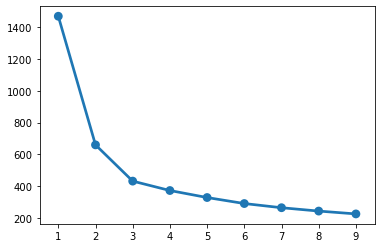

In [92]:
sns.pointplot(a,wss);

#### <span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#0e92ea;">Finding the optimum number of clusters from the WSS plot in the previous question.

From the above graph, the elbow curve happens at Cluster 3. We can choose either 2 or 3. However recommending to go for optimum Clusters' selection after validating the 'silhouette score'.

#### <span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#0e92ea;">Performing the K-Means clustering with 2 clusters and finding the within cluster sum of squares.

In [93]:
k_means2 = KMeans(n_clusters = 2,random_state=1)
k_means2.fit(scaled_df)
labels_2 = k_means2.labels_
labels_2

array([1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1], dtype=int32)

In [94]:
k_means2.inertia_

659.171754487041

#### <span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#0e92ea;">Performing the K-Means clustering with 3 clusters and finding the within cluster sum of squares.

In [95]:
k_means3 = KMeans(n_clusters = 3,random_state=1)
k_means3.fit(scaled_df)
labels_3 = k_means3.labels_
labels_3

array([2, 0, 2, 1, 2, 1, 1, 0, 2, 1, 2, 0, 1, 2, 0, 1, 0, 1, 1, 1, 1, 1,
       2, 1, 0, 2, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2,
       1, 1, 0, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 1, 1, 2, 0, 1, 1, 0, 0, 2,
       2, 0, 2, 1, 0, 1, 2, 2, 1, 2, 0, 1, 2, 0, 0, 0, 0, 2, 1, 0, 2, 0,
       2, 1, 0, 2, 0, 1, 1, 2, 2, 2, 1, 2, 0, 2, 0, 2, 0, 2, 2, 1, 1, 2,
       0, 0, 2, 1, 1, 2, 0, 0, 1, 2, 0, 1, 1, 1, 0, 0, 2, 1, 0, 0, 1, 0,
       0, 2, 1, 2, 2, 1, 2, 0, 0, 0, 1, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 2, 2, 1, 2, 2, 2, 1, 0, 0, 0, 1, 0, 1, 0, 2, 2, 2,
       0, 1, 0, 1, 0, 0, 0, 0, 2, 2, 1, 0, 0, 1, 1, 0, 1, 2, 0, 2, 2, 1,
       2, 1, 0, 2, 0, 1, 2, 0, 2, 0, 0, 0], dtype=int32)

In [96]:
k_means3.inertia_

430.6589731513006

#### <span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#0e92ea;">Performing the K-Means clustering with 4 clusters and finding the within cluster sum of squares.

In [97]:
k_means4 = KMeans(n_clusters = 4,random_state=1)
k_means4.fit(scaled_df)
labels_4 = k_means4.labels_
labels_4

array([3, 1, 3, 0, 3, 0, 0, 1, 3, 0, 3, 1, 0, 3, 1, 0, 1, 0, 1, 0, 0, 0,
       3, 0, 1, 2, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 3, 3, 1, 2, 3,
       0, 0, 1, 3, 3, 3, 0, 3, 3, 3, 3, 2, 0, 0, 0, 3, 1, 0, 0, 2, 1, 3,
       3, 1, 3, 1, 1, 0, 3, 3, 0, 3, 1, 0, 2, 1, 1, 1, 1, 3, 0, 2, 2, 2,
       2, 0, 1, 3, 1, 0, 1, 3, 3, 2, 0, 2, 1, 3, 2, 3, 1, 3, 3, 0, 1, 3,
       2, 1, 3, 0, 0, 2, 1, 1, 0, 3, 1, 0, 0, 0, 1, 1, 3, 0, 1, 1, 0, 1,
       1, 3, 0, 3, 3, 0, 2, 1, 2, 1, 0, 0, 1, 0, 3, 0, 1, 0, 1, 0, 1, 2,
       0, 1, 1, 0, 1, 2, 3, 0, 3, 2, 3, 0, 2, 1, 1, 0, 1, 0, 1, 3, 3, 3,
       1, 1, 2, 0, 1, 1, 1, 1, 2, 2, 1, 2, 1, 0, 1, 1, 0, 3, 1, 2, 3, 0,
       3, 0, 1, 2, 1, 0, 2, 1, 2, 1, 2, 2], dtype=int32)

In [98]:
k_means4.inertia_

371.38509060801096

#### <span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#0e92ea;">Checking the average silhouette score and silhouette width of the cluster(s) thus created.

In [99]:
k_means2 = KMeans(n_clusters = 2,random_state=1)
k_means2.fit(scaled_df)
labels2 = k_means2.labels_
silhouette_score(scaled_df,labels2,random_state=1)

0.46577247686580914

In [100]:
k_means3 = KMeans(n_clusters = 3,random_state=1)
k_means3.fit(scaled_df)
labels3 = k_means3.labels_
silhouette_score(scaled_df,labels3,random_state=1)

0.4007270552751299

In [101]:
k_means4 = KMeans(n_clusters = 4,random_state=1)
k_means4.fit(scaled_df)
labels4 = k_means4.labels_
silhouette_score(scaled_df,labels4,random_state=1)

0.3276547677266193

<b>Selecting Clusters of 2 as the Silhouette score is high among 3 (Clusters 2,3,4) with 0.466.    
    
This score also means that the clusters are well separated (SIL score>0 and postive).</b>

#### <span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#0e92ea;">Adding the cluster labels to the dataset which has the cluster labels of Hierarchical Clustering.

In [102]:
bm["Clus_kmeans2"] = labels2
bm.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,H_clusters,Agglo_CLusters,Clus_kmeans2
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550,1,1,1
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144,3,2,0
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148,1,1,1
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185,2,0,0
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837,1,1,1


In [103]:
bm.Clus_kmeans2.value_counts().sort_index()

0    133
1     77
Name: Clus_kmeans2, dtype: int64

Let's Export the new dataframe with both the cluster labels of Hierarchical Clustering and K-Means clustering into a csv.

In [104]:
clust_profile=bm.drop(['H_clusters','Agglo_CLusters'],axis=1)
clust_profile=clust_profile.groupby('Clus_kmeans2').mean()
clust_profile['freq']=bm.Clus_kmeans2.value_counts().sort_index()
clust_profile

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,freq
Clus_kmeans2,,,,,,,,
0,12.930602,13.693459,0.863577,5.339699,3.025917,3.827444,5.081737,133
1,18.158571,16.054805,0.883817,6.127429,3.660519,3.480417,5.971740,77


In [105]:
bm.to_csv('bank_marketing_kmeans2.csv')

#### <span style="font-family: Arial; font-weight:bold;font-size:1.3em;color:#FF0000;">1.5 Describe cluster profiles for the clusters defined. Recommend different promotional strategies for different clusters.

#### <span style="font-family: Arial; font-weight:bold;font-size:1.0em;color:#008B8B;">After performing Clustering using both Dendrogram & K-Means method, based on final Silhouette score, 2 clusters are formed.
    
    Selecting Clusters of 2, as the Silhouette score is high among 3 (Clusters 2,3,4) with 0.466.    
    This score also means that the clusters are well separated (SIL score>0 and postive).

From the correlation heat map done above, we can see the following top five with high postive correlation:
    
    1. spending vs advance_payments - 0.99
    2. credit_limit vs spending - 0.97
    3. current_balance vs advance_payments - 0.97
    4. current_balance vs spending - 0.95
    5. credit_limit vs advance_payments - 0.94 
    6. max_spent_in_single_shopping vs current_balance - 0.93
    
 What does these correlations say?
    
    1. Higher Advance-payments, higher the spending - Cluster 1
    2. Higher credit_limit, higher the spending - Cluster 1
    3. Higher the Advance_payments, higher the Current Balance - Cluster 1
    4. Higher the maximum spending in a single shopping, higher the Current balance - Cluster 1
    
Withe the above inference, we can cataegorise Cluster 1 Customers as " High Value" Customer Category>
    
    
#### <span style="font-family: Arial; font-weight:bold;font-size:1.0em;color:#0e92ea;">Cluster 1:- 77 Customers
    Higher Spending - 18.16
    Higher Advance payments - 16.06
    Higher Probability of full payment - 0.88
    Higher Current balance - 6.13
    Higher Credit limit - 3.66
    Lower Minimum payment amount - 3.48
    Higher spending in single shopping - 5.97
    
#### <span style="font-family: Arial; font-weight:bold;font-size:1.0em;color:#0e92ea;">Cluster 1: <u>High-Value</u> Customer category
    
    - is a high yield and high value customer.
    - is a High potential buyer.
    - is a better full payment customer.
    - is having higher probability of making full paynments.
    - is a high through-put per purchase customer (per bil value is high).
    
    . The company can run specific loyalty program for the Cluster 1.
    . The company can promote high-involvement(i.e.high-value) products for this set of customers.
    . The company can promote luxury/lifestyle products more as the Cluster 1 customers have the potential to         buy as well as make full payment.
    

#### <span style="font-family: Arial; font-weight:bold;font-size:1.0em;color:#B22222;">Cluster 0:- 133 customers  
    
    All variables are lower comapared to Cluster 1 except Minimum payment amount - 3.83 (when full payment is   low, Min payment can go higher).
    

#### <span style="font-family: Arial; font-weight:bold;font-size:1.0em;color:#B22222;">Cluster 0: <u>Regular</u> Category
    
    . The company should send frequent reminders regarding payment.
    . The company can promote low-involvement/need based products.
    . The company can offer attractive finance/EMI offers as it will induce purchase among these customers.
    . The comapny should focus on Low spending-payment ratio rather than pushing for higher spending.
    
<b>Note: Feedback to the Company.</b>
   
   If we can further increase the samples/records will give us a opportunity to catogerise into 3 Cluster which was given a glimpse through dendrogram method. If Silhouette score can be higher for 3 Clusters, maybe we can Cluster as High Value, Regular and potential risk category.
    

--------------------------------------------------------------------- End of Report ---------------------------------------------------------------------------------------